<a href="https://colab.research.google.com/github/srilav/machinelearning/blob/main/M3_AST_03_Linear_SVM_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 3: Linear Support Vector Machines

## Learning Objectives

At the end of the experiment, you will be able to:

* perform Linear SVM Classification
* perform Support Vector Regression
* visualize the boundary regions on the plane
* visualize the regression line using Support Vector Regressor
* compare LinearSVC, SVC and SGDClassifier

### Support Vector Machine - Classification (SVC)

**Support vector machines** are a set of supervised learning methods used for classification, regression, and outliers detection. 

A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.

**Hyperplanes** are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.
 * The hyperplane with maximum margin is called the optimal hyperplane.

**Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. 

**Margin** is the width that the boundary could be increased by before hitting a data point.

![wget](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)






### Implementing SVM classifier

#### Dataset

The dataset used in this assignment is `Car_Advertisement` consists of data collected by a car retail company on their previous customers.

The datafields are:

* User ID 
* Gender
* Age
* Salary
* Purchased (whether or not they purchased a car - this is the target for our predictions) 

Problem statement: Using the data, we will try to predict if a new customer will purchase a car based on their gender, age and salary.



### Setup Steps:

In [64]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200183" #@param {type:"string"}

In [65]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "7671846954" #@param {type:"string"}

In [66]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M3_AST_03_Linear_SVM_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/Car_Advertisement.csv")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/position_salaries.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [67]:
import numpy as np                                                        # basic library to work with arrays
import pandas as pd                                                       # to read files
import seaborn as sns                                                     # library for statistical data visualization
import matplotlib.pyplot as plt                                           # basic library for plotting graphs and visualization
from matplotlib.colors import ListedColormap                              # for filling colors in mapping
from sklearn.metrics import confusion_matrix, accuracy_score              # importing confusion matrix, accuracy score
from sklearn.svm import SVC, SVR, LinearSVC                               # importing Support vector classifier, Support Vector Regressor, LinearSVC  
from sklearn.preprocessing import StandardScaler, LabelEncoder            # preprocessing
from sklearn.model_selection import train_test_split                      # for splitting the dataset
from mlxtend.plotting import plot_decision_regions                        # to plot the decision boundaries and hyperplane
from sklearn.pipeline import make_pipeline                                # to import pipeline
from sklearn.linear_model import SGDClassifier                            # to import SGD Classifier

#### Importing the dataset

In [68]:
dataset= pd.read_csv('Car_Advertisement.csv')

In [69]:
# converting categorical variables and assigning 0 and 1
def converter(Purchased):
    if Purchased == 'Not Purchased':
        return 0
    else:
       Purchased == 'Purchased'
       return 1

In [70]:
# apply converter function to update the 'Purchased' after assigning 0 and 1
dataset['Purchased'] = dataset['Purchased'].apply(converter)

In [71]:
# first five rows of dataset
dataset.head()        

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [72]:
dataset.shape

(400, 5)

The dataset contains 400 rows and 5 attributes.

#### Extracting Independent and dependent Variable  

In [73]:
# defining the independent and dependent variable
x = dataset.iloc[:, [2,3]].values                  
y = dataset.iloc[:, 4].values                      

#### Splitting the dataset into training and test set.  

In [74]:
# using train test split, splitting the dataset into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)  

#### Feature Scaling  

In [75]:
# Scaling the data
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test)       

#### Fitting the SVM classifier to the training set

In [76]:
# kernel = 'linear' is used on data which is separable
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Let us also fit the data using **LinearSVC** and compare it with **SVC(kernel='linear')** performed above. Learn about their differences [here](https://intellipaat.com/community/19783/which-one-is-better-linearsvc-or-svc).

In [77]:
# Make a pipeline of Scaling and SVM
clf = make_pipeline(StandardScaler(),
                     LinearSVC(random_state=0, tol=1e-5))
clf.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=0,
                           tol=1e-05, verbose=0))],
         verbose=False)

#### Predicting the test set result  


In [78]:
# predicting using SVC with kernel='Linear'
y_pred = classifier.predict(x_test)   
print("predicted values ",y_pred)   

predicted values  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [79]:
# predicting using LinearSVC
y_pred1 = clf.predict(x_test)      
print("predicted values ",y_pred1)     

predicted values  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


#### Creating the Confusion matrix  


A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [80]:
# confusion matrix between true values and predicted outcomes for first model
cm = confusion_matrix(y_test, y_pred)   
cm

array([[66,  2],
       [ 8, 24]])

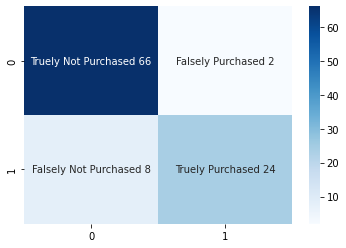

In [81]:
# Heatmap of SVC with kernel as linear
labels = ['Truely Not Purchased 66','Falsely Purchased 2','Falsely Not Purchased 8','Truely Purchased 24']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [82]:
# creating confusion matrix between true values and predicted outcomes for second model
cm1 = confusion_matrix(y_test, y_pred1)   
cm1

array([[66,  2],
       [ 8, 24]])

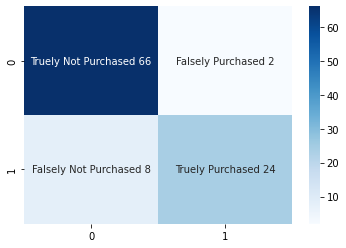

In [83]:
# Heatmap of LinearSVC
labels = ['Truely Not Purchased 66','Falsely Purchased 2','Falsely Not Purchased 8','Truely Purchased 24']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')

Here, 66 are showing a true positive value and 24 are showing a true negative value for both the models.

So, we can say that both of them are giving the same predictions.

#### Visualizing the training set result

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


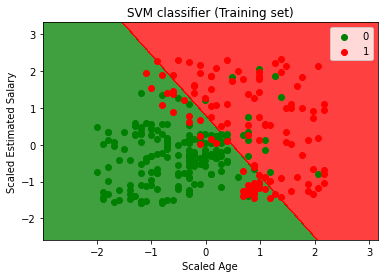

In [84]:
x_set, y_set = x_train, y_train  
# Creating a meshgrid
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01), 
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
                           
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('green', 'red')))                                                                  # plotting the contour lines here
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
# defining a for loop for segregating the purchased as 0 and 1
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('green', 'red'))(i), label = j)                                                             # giving the green label to all 0 and red label to all 1
plt.title('SVM classifier (Training set)')  
plt.xlabel('Scaled Age')  
plt.ylabel('Scaled Estimated Salary')  
plt.legend()  
plt.show()  

In the output, we got the straight line as a hyperplane because we have used a linear kernel in the classifier.

To know more about meshgrid, click [here](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).

#### Visualizing the test set result

Just similar to above, here we are visualizing the test results or predicted results.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


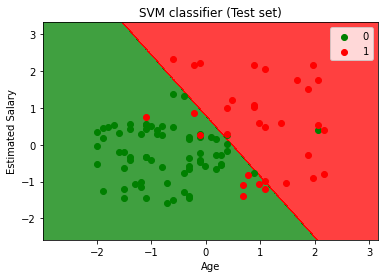

In [85]:
x_set, y_set = x_test, y_test  
# Creating a meshgrid
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01), 
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('green','red' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('green', 'red'))(i), label = j)  
plt.title('SVM classifier (Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

In the above output image, the SVM classifier has divided the users into two regions (Purchased or Not purchased). Users who purchased the SUV are in the red region with the red scatter points. And users who did not purchase the SUV are in the green region with green scatter points. The hyperplane has divided the two classes into Purchased and Not purchased variables.

In [86]:
# calculating the accuracy 
accuracy_score(y_test, y_pred)

0.9

Thus, we get an accuracy of 90% on testing data.

### Implementing SGD Classifier

Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing learning rate. SGD allows minibatch (online/out-of-core) learning via the `partial_fit` method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

In [87]:
# Always scale the input. The most convenient way is to use a pipeline.
clf2 = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, tol=1e-3, loss="hinge"))
clf2.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

**Note:** By default, loss is "hinge". It gives a Linear SVM. So, here we can see that if there are any changes in the predictions using SGD Classifier.

#### Predicting Results

In [88]:
# predicting results using SGD Classifier
y_pred2 = clf2.predict(x_test)              

In [89]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

#### Creating Confusion Matrix

In [90]:
# confusion matrix between true values and predicted outcomes for SGD Classifier
cm2 = confusion_matrix(y_test, y_pred2)    
cm2

array([[65,  3],
       [11, 21]])

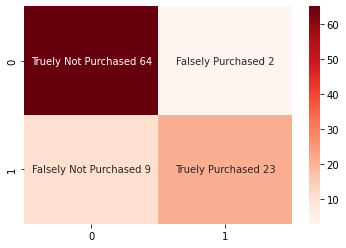

In [91]:
# Heatmap of sgd classifier
labels = ['Truely Not Purchased 64','Falsely Purchased 2','Falsely Not Purchased 9','Truely Purchased 23']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm2, annot=labels, fmt='', cmap='Reds')

#### Calculating Accuracy

In [92]:
accuracy_score(y_test, y_pred2)

0.86

Using SGD Classifier with loss="hinge", we get an accuracy of 87%. 

To know more about SGDClassifier, click [here](https://michael-fuchs-python.netlify.app/2019/11/11/introduction-to-sgd-classifier/).

### Support Vector Machine - Regression (SVR)

To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting
margin violations, SVM Regression tries to fit as many instances as possible
on the street while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, ε

![Image](https://www.saedsayad.com/images/SVR_2.png)

### Implementing Support Vector Regression (SVR)

#### Dataset

The dataset (Position_Salaries) consists of a list of positions in a company along with the band levels and their associated salary.

Information Used To Predict Salaries:

* Job Type: The position held (Business Analyst, Junior Consultant, Senior Consultant….)
* Position Level: Experience in years (1,2,3…..)

**Problem Statement**

To predict the accurate salary of an employee having a level 6.5, using SVM regression.

#### Importing the datasets

In [93]:
dataset = pd.read_csv('position_salaries.csv')
#  defining independent and dependent variables
X = dataset.iloc[:, 1:-1].values                        
y = dataset.iloc[:, -1].values                         

In [94]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [95]:
dataset.shape

(10, 3)

#### Splitting the dataset into the Training set and Test set

In [96]:
# using train test split, splitting the dataset into training and testing data
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [97]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [98]:
y = y.reshape(len(y),1)

In [99]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


#### Feature Scaling

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [100]:
# Scaling the data
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)   
print(y)  

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#### Training the SVR model

In [101]:
# defining the SVR model
regressor = SVR(kernel = 'rbf')        
regressor.fit(X, y)                    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

To know about .fit(), click [here](https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f).

#### Predicting new Results

Here we will predict the new salary according to 6.5 level,i.e., 6.5 years of experience.

In [102]:
# Reversing the scaling of y.
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

#### Visualizing the SVR results

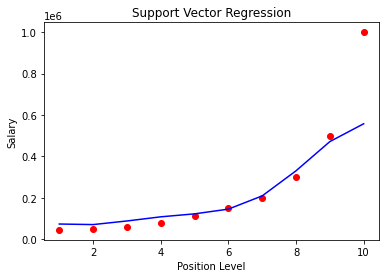

In [103]:
 # plotting Real Salaries as red dot scatter plot
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")                   
# plotting the Predicted salaries by SVR Model
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = "blue")   
plt.title("Support Vector Regression")                                                              
plt.xlabel("Position Level")                                                                        
plt.ylabel("Salary")   
plt.show()                                                                             

In the output- we have the best fit line that has the maximum number of points. The red dots show the actual dataset points and the blue line is the best fit obtained using SVM regressor.

#### Visualizing the SVR result (for higher resolution and smoother curve)

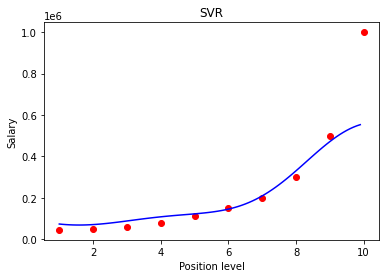

In [104]:
# make a grid of features from minimum to maximum value with a step of 0.1
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)    
# reshaping the X_grid to a column              
X_grid = X_grid.reshape((len(X_grid), 1))                                            
# plotting the actual values of salary as red dot                   
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')   
# plotting the predicted values of salary on a blue line (best fit line)                      
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')      
plt.title('SVR')                                                                                         
plt.xlabel('Position level')                                                                             
plt.ylabel('Salary')                                                                                     
plt.show()

Here, we obtain a more smooth fit line.

### Theory Questions


1. What is the fundamental idea behind Support Vector Machines?

  The fundamental idea behind Support Vector Machines is to fit the widest possible "street" between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. 
  
  When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street).

2. What is a support vector?

  After training an SVM, a support vector is any instance located on the "street", including its border. The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., off the street) has no influence whatsoever. Computing the predictions only involve the support vectors, not the whole training set.

3. Why is it important to scale the inputs when using SVMs?

  SVMs try to fit the largest possible "street" between the classes, so if the training set is not scaled, the SVM will tend to neglect small features.

4. Can an SVM classifier output a confidence score when it classifies an instance? What about probability?

  An SVM classifier can output the distance between the test instance and the decision boundary, and you can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM's scores. This will add the predict_proba() and predict_log_proba() methods to the SVM.

5. How does SVM regression work?

  You reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street).

  The idea is that the decision boundary becomes the prediction function and you want it to be as close as possible to the values of the instances.
The width of the street is controlled by a hyperparameter epsilon.

### Please answer the questions below to complete the experiment:




In [105]:
#@title Select the FALSE statement w.r.t an SVM classifier: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "It makes a decision boundary in such a way that the separation between the two classes is as wide as possible" #@param ["", "It makes a decision boundary in such a way that the separation between the two classes is as wide as possible", "It finds the points closest to the line from both the classes. These points are called support vectors", "The objective of the algorithm is to minimize the margin i.e. the distance between the line and the support vectors"]

In [106]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [107]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Good" #@param {type:"string"}


In [108]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [109]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [110]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [111]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4090
Date of submission:  01 Oct 2021
Time of submission:  19:07:50
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
